# Writing Processes

In [1]:
from helper import *

# Import Data

In [2]:
# root dir
root = 'data/'#'/kaggle/input/linking-writing-processes-to-writing-quality/'

# load in features and labels
logs = pd.read_csv(root + 'train_logs.csv')
scores = pd.read_csv(root + 'train_scores.csv')

# check shape and nulls
show_shape_and_nulls(logs)

Shape: (8405898, 11)
Null values:


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0,0,0,0,0,0,0,0,0,0,0


- No null values.
- __logs__ is a massive dataset containing over 8 million rows, each being an independent keystroke/cursor action used in producing an essay.

In [ ]:
# look at unique vals
show_unique_vals_and_dtypes(logs)

"id" has 2471 unique values

"event_id" has 12876 unique values

"down_time" has 1836078 unique values

"up_time" has 1835993 unique values

"action_time" has 3509 unique values

"activity" has 50 unique values

"down_event" has 131 unique values

"up_event" has 130 unique values

"text_change" has 4111 unique values

"cursor_position" has 7803 unique values

"word_count" has 1327 unique values



- Most cols are numerical.

In [ ]:
# activity col
logs.activity.unique()[:10]

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace',
       'Move From [284, 292] To [282, 290]',
       'Move From [287, 289] To [285, 287]',
       'Move From [460, 461] To [465, 466]', 'Paste',
       'Move From [905, 1314] To [907, 1316]',
       'Move From [565, 743] To [669, 847]'], dtype=object)

- "activity" really only contains 6 unique categories, but the "Move From" contains many unique [x1,x2] values

In [8]:
logs.sample()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
5136838,a0c24719,370,87145,87250,105,Input,q,q,q,211,35


# EDA

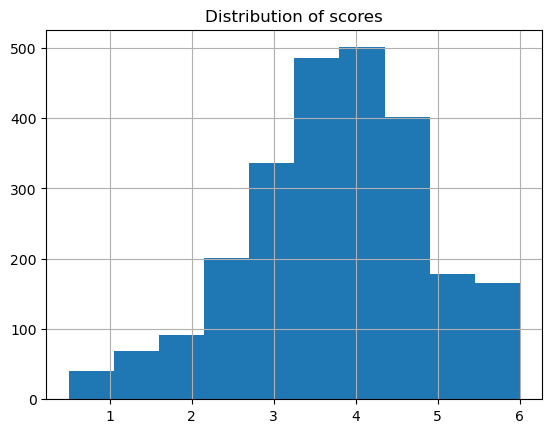

In [4]:
plt.title('Distribution of scores')
scores['score'].hist();

In [5]:
scores['score'].describe()

count    2471.000000
mean        3.711251
std         1.024937
min         0.500000
25%         3.000000
50%         4.000000
75%         4.500000
max         6.000000
Name: score, dtype: float64

- Min score of 0.5, max of 6

In [ ]:
# look at some training data
print(logs.shape)
logs.head()

(8405898, 11)


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [7]:
# look at some (dummy) test data
print(test.shape)
test.head()

(6, 11)


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0


In [ ]:
logs.id.nunique()

2471

- 2471 total writers
- 8.4m total actions

In [ ]:
# check dtypes
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [ ]:
# look at nulls in logs
logs.isnull().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

In [ ]:
# combine 'Move' activities, look at 6 unique activities
logs.loc[logs['activity'].str.contains('Move', na=False), 'activity'] = 'Move'
logs['activity'].unique()

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace', 'Move', 'Paste'],
      dtype=object)

In [ ]:
# distribution of activities
logs['activity'].value_counts(normalize=True)

Input            0.800247
Remove/Cut       0.115414
Nonproduction    0.083733
Replace          0.000529
Paste            0.000071
Move             0.000005
Name: activity, dtype: float64

In [ ]:
# where down and up event differ
logs[logs['down_event'] != logs['up_event']]['activity'].value_counts()

Replace          523
Input              7
Nonproduction      4
Name: activity, dtype: int64

### Look at different down_events with respect to each of the 6 activities

In [ ]:
# first, look at all down_events
logs['down_event'].unique()

array(['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight', '-', '?', 'Tab', '"',
       'ArrowUp', 'ArrowDown', 'Rightclick', '=', 'CapsLock', 'Control',
       'c', 'v', '/', 'Delete', ':', 'z', '[', '$', '(', ')', '+', 'Home',
       'End', '\\', 'Meta', '*', '&', 'AudioVolumeMute', 'x', '!',
       'Insert', 'MediaPlayPause', 'NumLock', '%', 'V', '>', 'Alt',
       'AudioVolumeUp', 'ContextMenu', 'AudioVolumeDown', 'a', '<',
       'PageDown', ']', 'Middleclick', '@', 'F12', 'j', '\x96', 'Dead',
       't', 's', 'n', 'y', '{', 'ScrollLock', '¿', 'Process', '}',
       'MediaTrackPrevious', 'MediaTrackNext', 'F3', '^', 'Unidentified',
       'Cancel', '2', 'i', 'd', 'r', 'e', '`', '\x9b', 'm', '#', '~',
       'PageUp', 'T', 'A', 'b', 'S', 'ModeChange', '_', 'Escape', 'F11',
       'Unknownclick', 'AltGraph', 'F10', 'h', 'F15', 'Clear', 'OS', 'F',
       'C', 'o', 'Ä±', 'f', 'u', 'w', 'p', 'g', 'M', 'l', '|',
       'â\x80\x

In [ ]:
logs[logs['activity'] == 'Nonproduction']['down_event'].unique()

array(['Leftclick', 'Shift', 'ArrowLeft', 'ArrowRight', 'Tab', 'ArrowUp',
       'ArrowDown', 'Rightclick', 'Backspace', 'CapsLock', 'Control', 'c',
       'v', 'Home', 'End', 'Meta', 'AudioVolumeMute', 'Insert',
       'MediaPlayPause', 'NumLock', 'Alt', 'AudioVolumeUp', 'ContextMenu',
       'AudioVolumeDown', 'Delete', 'Space', 'a', '.', 'Enter',
       'PageDown', 'Middleclick', 'F12', 'j', 'Dead', 't', 'z', 'y', ',',
       'ScrollLock', 'Process', 'MediaTrackPrevious', 'MediaTrackNext',
       'F3', 'Unidentified', 'Cancel', '2', '=', 's', 'm', 'PageUp', 'T',
       'A', 'b', 'e', 'ModeChange', 'Escape', 'F11', 'Unknownclick',
       'AltGraph', 'F10', 'i', 'F15', 'Clear', 'OS', 'F', '/', 'C', 'o',
       'r', 'h', 'f', 'u', 'w', 'p', 'd', 'g', 'M', 'l', '-', 'x', 'I',
       '0', '1', '5', "'", 'n', ';', 'V', 'F2', 'F1', '+', 'Pause', 'F6',
       '`'], dtype=object)

In [ ]:
logs[logs['activity'] == 'Input']['down_event'].unique()

array(['q', 'Space', '.', ',', 'Enter', "'", ';', '-', '?', '"', '=', '/',
       ':', 'z', '[', '$', '(', ')', '+', '\\', '*', '&', '!', '%', '>',
       '<', ']', '@', '\x96', '{', '¿', '}', '^', '`', '\x9b', '#', '~',
       '_', 'Ä±', '|', 'â\x80\x93', '\x97', 'Ë\x86', '¡', '\x80', 'Â´',
       'Å\x9f', 'ä'], dtype=object)

In [ ]:
logs[logs['activity'] == 'Remove/Cut']['down_event'].unique()

array(['Backspace', 'Delete', 'Rightclick', 'z', 'x'], dtype=object)

In [ ]:
logs[logs['activity'] == 'Replace']['down_event'].unique()

array(['Space', 'q', '=', 'Rightclick', 'z', ',', '.', 'v', ';', 'Enter',
       '"', '-', ':', '\\', '[', 'V', 't', '/', "'", '!', '?', ']', '(',
       'Leftclick'], dtype=object)

In [ ]:
logs[logs['activity'] == 'Move']['down_event'].unique()

array(['Leftclick', 'z'], dtype=object)

In [ ]:
logs[logs['activity'] == 'Paste']['down_event'].unique()

array(['Space', 'v', 'z', 'V', 'Rightclick', 't', 's', 'n', '.', 'Enter',
       'i', 'a', 'd', 'r', 'e', 'S', 'h', 'c', 'u', 'o', 'p', 'm'],
      dtype=object)

# Create feature df

In [21]:
# this function attempts to count the number of sentences in the essay
def count_sentences(event_string):
    punctuation_marks = ['.', '!', '?']
    count = 0
    
    for char in event_string:
        if char in punctuation_marks:
            count += 1

    return count


Technically, the above function is not 100% accurate, as there are some periods in the text that may not be sentence-ending. This function provides a rough estimation of sentences in each essay.

In [ ]:
# Group by 'id' and join all characters in 'down_event' into single strings
aggregated_events = logs.groupby('id')['down_event'].apply(lambda x: ''.join(x.fillna(''))).reset_index(name='event_string')
aggregated_events['num_sentences'] = aggregated_events['event_string'].apply(count_sentences)

aggregated_events

,id,event_string,num_sentences
0,001519c8,LeftclickLeftclickShiftqqqqqqSpaceqqqSpaceqqqq...,21
1,0022f953,LeftclickShiftqqqqSpaceqqSpaceShiftqqqqqqqqqqq...,18
2,0042269b,LeftclickShiftqqqqqqqSpaceqqqSpaceqqqqSpaceqqq...,21
3,0059420b,LeftclickLeftclickShiftShiftShiftShiftShiftShi...,13
4,0075873a,LeftclickShiftqqqqqqqqqqqSpaceqqSpaceqLeftclic...,25
...,...,...,...
2466,ffb8c745,LeftclickTabLeftclickSpaceSpaceSpaceSpaceSpace...,43
2467,ffbef7e5,LeftclickLeftclickShiftqqqqSpaceqqqqqqSpaceqqq...,31
2468,ffccd6fd,LeftclickLeftclickqqqqqqSpaceqqqqSpaceqSpaceqq...,5
2469,ffec5b38,LeftclickShiftqqqqqqqqBackspaceqqqSpaceqqqqqqq...,31


In [23]:
aggregated_events['num_sentences'].describe()

count    2471.000000
mean       25.611898
std        11.945131
min         1.000000
25%        17.000000
50%        23.000000
75%        32.000000
max        91.000000
Name: num_sentences, dtype: float64

Min of 1 sentence, max of 91 (which is probably an over-estimate)

In [82]:
def create_features_dataframe(df: pd.DataFrame, all_inputs=False) -> pd.DataFrame:
    # if activity column contains 'Move', set that value to 'Move'
    df.loc[df['activity'].str.contains('Move', na=False), 'activity'] = 'Move'

    # group users by id
    grouped = df.groupby('id')

    # calculate summary statistics for each user
    features = grouped.agg({
        'down_time': ['sum', 'mean', 'std', 'min', 'max'], 
        'up_time': ['sum', 'mean', 'std', 'min', 'max'],    
        'action_time': ['sum', 'mean', 'std', 'min', 'max'],
        'id': 'count'                                       
    })

    # flatten the multi-level columns
    features.columns = ['_'.join(col).strip() for col in features.columns.values]

    # reset index to make 'id' a column again
    features.reset_index(inplace=True)

    # rename the column to indicate total actions
    features = features.rename(columns={"id_count": "tot_actions"})



    # group by 'id and take the last 'word_count' value, add to features dataframe
    last_word_count = df.groupby('id')['word_count'].last().reset_index()
    features = features.merge(last_word_count, on='id', how='left')
    features = features.copy()



    # group by 'id' and join all characters in 'down_event' into single strings
    aggregated_events = df.groupby('id')['down_event'].apply(lambda x: ''.join(x.fillna(''))).reset_index(name='event_string')
    aggregated_events['num_sentences'] = aggregated_events['event_string'].apply(count_sentences)

    # merge num_sentences into features dataframe
    features = features.merge(aggregated_events[['id', 'num_sentences']], on='id', how='left')
    features = features.copy()


    
    # add column 'keys_per_word'
    features['keys_per_word'] = features['tot_actions'] / features['word_count']

    # replace infinite values (from dummy test data) with 0
    features['keys_per_word'].replace([np.inf, -np.inf], 0, inplace=True)



    # calculate the count of each activity type per user
    activity_counts = df.pivot_table(index='id', columns='activity', aggfunc='size', fill_value=0).reset_index()

    # fill non-present activities with 0
    expected_activities = ['Move', 'Nonproduction', 'Paste', 'Remove/Cut', 'Replace', 'Input']
    for activity in expected_activities:
        if activity not in activity_counts:
            activity_counts[activity] = 0

    # calculate the percentages by dividing each activity count by the total count of activities ('tot_actions')
    activity_percentages = activity_counts.iloc[:, 1:].div(features['tot_actions'], axis=0)
    activity_percentages.columns = [str(col) + '_percent' for col in activity_percentages.columns]

    # add the 6 activity percentages cols to the features dataframe
    features = pd.concat([features, activity_percentages], axis=1)
    features = features.copy()



    # if all_inputs=True, add all individual chars as columns to feature df
    if all_inputs == True:
        inputs = df.pivot_table(index='id', columns='down_event', aggfunc='size', fill_value=0).reset_index()

        # merge the input columns into features dataframe
        features = features.merge(inputs, on='id', how='left')
        features = features.copy()

        # unique_down_events from training data
        unique_down_events = ['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight', '-', '?', 'Tab', '"',
       'ArrowUp', 'ArrowDown', 'Rightclick', '=', 'CapsLock', 'Control',
       'c', 'v', '/', 'Delete', ':', 'z', '[', '$', '(', ')', '+', 'Home',
       'End', '\\', 'Meta', '*', '&', 'AudioVolumeMute', 'x', '!',
       'Insert', 'MediaPlayPause', 'NumLock', '%', 'V', '>', 'Alt',
       'AudioVolumeUp', 'ContextMenu', 'AudioVolumeDown', 'a', '<',
       'PageDown', ']', 'Middleclick', '@', 'F12', 'j', '\x96', 'Dead',
       't', 's', 'n', 'y', '{', 'ScrollLock', '¿', 'Process', '}',
       'MediaTrackPrevious', 'MediaTrackNext', 'F3', '^', 'Unidentified',
       'Cancel', '2', 'i', 'd', 'r', 'e', '`', '\x9b', 'm', '#', '~',
       'PageUp', 'T', 'A', 'b', 'S', 'ModeChange', '_', 'Escape', 'F11',
       'Unknownclick', 'AltGraph', 'F10', 'h', 'F15', 'Clear', 'OS', 'F',
       'C', 'o', 'Ä±', 'f', 'u', 'w', 'p', 'g', 'M', 'l', '|',
       'â\x80\x93', 'I', '0', '1', '5', '\x97', 'Ë\x86', '¡', '\x80',
       'Â´', 'Å\x9f', 'F2', 'ä', 'F1', 'Pause', 'F6']
        
        # if down_event not in test data, add column with all 0s
        for event in unique_down_events:
            if event not in features.columns:
                features[event] = 0



    return features


In [ ]:
# create the 2 different features dataframes
train_inputs_false = create_features_dataframe(logs, all_inputs=False)
train_inputs_true = create_features_dataframe(logs, all_inputs=True)

In [27]:
# add essay scores
train_inputs_false = train_inputs_false.merge(scores, on='id', how='left')
train_inputs_true = train_inputs_true.merge(scores, on='id', how='left')

# check
train_inputs_false.shape, train_inputs_true.shape

((2471, 27), (2471, 158))

- ID and score cols are not features.
- Have a 25-feature df, and a 156-feature df (with counts of each unique down_event).

In [ ]:
# look at final logs df
train_inputs_true

,id,down_time_sum,down_time_mean,down_time_std,down_time_min,down_time_max,up_time_sum,up_time_mean,up_time_std,up_time_min,up_time_max,action_time_sum,action_time_mean,action_time_std,action_time_min,action_time_max,tot_actions,word_count,num_sentences,keys_per_word,Input_percent,Move_percent,Nonproduction_percent,Paste_percent,Remove/Cut_percent,Replace_percent,!,"""",#,$,%,&,',(,),*,+,",",-,.,/,0,1,2,5,:,;,<,=,>,...,Unknownclick,V,[,\,],^,_,`,a,b,c,d,e,f,g,h,i,j,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,{,|,},~,,,,,¡,¿,Â´,Ä±,Å,Ë,â,ä,score
0,001519c8,2168798234,8.481808e+05,395112.665961,4526,1801877,2169095477,8.482970e+05,395105.685655,4557,1801969,297243,116.246774,91.797374,0,2259,2557,255,21,10.027451,0.786077,0.001173,0.046930,0.000000,0.163082,0.002738,0,0,0,0,0,0,3,0,0,0,0,12,0,21,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5
1,0022f953,1273271023,5.188553e+05,384959.404177,30623,1788842,1273546414,5.189676e+05,384952.728796,30853,1788969,275391,112.221271,55.431189,0,1758,2454,320,18,7.668750,0.789731,0.000000,0.103504,0.000407,0.105949,0.000407,0,6,0,0,0,0,3,0,0,0,0,21,5,15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5
2,0042269b,3426641982,8.284918e+05,489500.796565,4441,1771219,3427063183,8.285936e+05,489500.438784,4540,1771669,421201,101.837766,82.383766,0,3005,4136,404,21,10.237624,0.849855,0.000000,0.042311,0.000000,0.106141,0.001692,0,2,0,0,0,0,0,0,0,0,0,23,1,21,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0
3,0059420b,1222211589,7.854830e+05,385205.014399,41395,1404394,1222401185,7.856049e+05,385206.081250,41513,1404469,189596,121.848329,113.768226,0,806,1556,206,13,7.553398,0.838046,0.000000,0.063625,0.000643,0.097044,0.000643,0,0,0,0,0,0,2,0,0,0,0,3,0,13,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1038,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
4,0075873a,1805499474,7.133542e+05,405576.409034,78470,1662390,1805813176,7.134781e+05,405575.631746,78693,1662472,313702,123.943896,62.082013,0,701,2531,252,25,10.043651,0.767286,0.000000,0.028447,0.000000,0.204267,0.000000,0,0,0,0,0,0,17,0,0,0,0,24,0,23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,3488386746,7.361019e+05,503882.020411,22467,1791581,3488886416,7.362073e+05,503869.416702,22551,1791649,499670,105.437856,63.622575,0,3323,4739,273,43,17.358974,0.757122,0.000000,0.039882,0.000000,0.202574,0.000422,0,4,0,0,0,0,7,0,0,0,0,32,1,43,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5
2467,ffbef7e5,2192480040,8.419662e+05,512744.745940,21732,1799124,2192694261,8.420485e+05,512743.480803,22027,1799174,214221,82.266129,36.178818,0,1144,2604,438,31,5.945205,0.919739,0.000000,0.056836,0.000000,0.023041,0.000384,0,0,0,0,0,0,8,0,0,0,0,24,0,31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0
2468,ffccd6fd,3764472937,1.229015e+06,514320.848199,23482,1959273,3764704517,1.229091e+06,514304.092076,23570,1959363,231580,75.605615,63.494975,0,564,3063,201,5,15.238806,0.930134,0.000000,0.041136,0.000000,0.028730,0.000000,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Pipeline

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

In [30]:
# function to calculate negative RMSE
def negative_rmse(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

# greater_is_better=False because we want lower RMSE
rmse_scorer = make_scorer(negative_rmse, greater_is_better=False)

In [31]:
# look at 8 regressors with default hyperparameters
regressors = [['NeuralNetwork :', MLPRegressor(max_iter = 1000, random_state=random_state)],
               ['LinearRegression :', LinearRegression(n_jobs=-1)],
               ['ExtraTreesClassifier :', ExtraTreesRegressor(n_jobs=-1, random_state=random_state)],
               ['DecisionTree :',DecisionTreeRegressor(random_state=random_state)],
               ['RandomForest :',RandomForestRegressor(n_jobs=-1, random_state=random_state)],
               ['KNeighbors :', KNeighborsRegressor(n_jobs=-1)],
               ['SVM :', SVR()],
               ['XGB :', XGBRegressor(n_jobs=-1, random_state=random_state)]]

In [32]:
# create features and target for 25 feat data
X_false = train_inputs_false.drop(['id', 'score'], axis=1)
y_false = train_inputs_false['score']

# create features and target for 156 feat data
X_true = train_inputs_true.drop(['id', 'score'], axis=1)
y_true = train_inputs_true['score']

In [43]:
# StandardScaler

# look at scores for 25 feat data
print('WITHOUT down_event counts:\n')
for name,regressor in regressors:
    # create the pipeline
    pipe = Pipeline([('scaler', StandardScaler()), 
                     (name, regressor)
                     ])
    
    print(name, round(cross_val_score(pipe, X_false, y_false, cv=5, scoring=rmse_scorer, n_jobs=-1).mean(), 3))

# look at scores for 156 feat data
print('\n\n\nWITH down_event counts:\n')
for name,regressor in regressors:
    # create the pipeline
    pipe = Pipeline([('scaler', StandardScaler()), 
                     (name, regressor)
                     ])
    
    print(name, round(cross_val_score(pipe, X_true, y_true, cv=5, scoring=rmse_scorer, n_jobs=-1).mean(), 3))


WITHOUT down_event counts:

NeuralNetwork : 0.741
LinearRegression : 0.758
ExtraTreesClassifier : 0.698
DecisionTree : 0.97
RandomForest : 0.696
KNeighbors : 0.787
SVM : 0.716
XGB : 0.735



WITH down_event counts:

NeuralNetwork : 9.596
LinearRegression : 7607436384048.263
ExtraTreesClassifier : 0.663
DecisionTree : 0.925
RandomForest : 0.66
KNeighbors : 0.789
SVM : 0.718
XGB : 0.694


In [42]:
# MinMaxScaler to see if there is any improvement

# look at scores for 25 feat data
print('WITHOUT down_event counts:\n')
for name,regressor in regressors:
    # create the pipeline
    pipe = Pipeline([('scaler', MinMaxScaler()), 
                     (name, regressor)
                     ])
    
    print(name, round(cross_val_score(pipe, X_false, y_false, cv=5, scoring=rmse_scorer, n_jobs=-1).mean(), 3))

# look at scores for 156 feat data
print('\n\n\nWITH down_event counts:\n')
for name,regressor in regressors:
    # create the pipeline
    pipe = Pipeline([('scaler', MinMaxScaler()), 
                     (name, regressor)
                     ])
    
    print(name, round(cross_val_score(pipe, X_true, y_true, cv=5, scoring=rmse_scorer, n_jobs=-1).mean(), 3))


WITHOUT down_event counts:

NeuralNetwork : 0.706
LinearRegression : 0.759
ExtraTreesClassifier : 0.698
DecisionTree : 0.973
RandomForest : 0.697
KNeighbors : 0.771
SVM : 0.702
XGB : 0.735



WITH down_event counts:

NeuralNetwork : 2.78
LinearRegression : 12181509978564.332
ExtraTreesClassifier : 0.663
DecisionTree : 0.924
RandomForest : 0.66
KNeighbors : 0.75
SVM : 0.689
XGB : 0.693


In [ ]:
# MinMaxScaler to see if there is any improvement

# look at scores for 25 feat data
print('WITHOUT down_event counts:\n')
for name,regressor in regressors:
    # create the pipeline
    pipe = Pipeline([('scaler', MinMaxScaler()), 
                     (name, regressor)
                     ])
    
    print(name, round(cross_val_score(pipe, X_false, y_false, cv=5, scoring=rmse_scorer, n_jobs=-1).mean(), 3))

# look at scores for 156 feat data
print('\n\n\nWITH down_event counts:\n')
for name,regressor in regressors:
    # create the pipeline
    pipe = Pipeline([('scaler', MinMaxScaler()), 
                     (name, regressor)
                     ])
    
    print(name, round(cross_val_score(pipe, X_true, y_true, cv=5, scoring=rmse_scorer, n_jobs=-1).mean(), 3))


WITHOUT down_event counts:

NeuralNetwork : 0.706
LinearRegression : 0.759
ExtraTreesClassifier : 0.698
DecisionTree : 0.973
RandomForest : 0.697
KNeighbors : 0.771
SVM : 0.702
XGB : 0.735



WITH down_event counts:

NeuralNetwork : 2.78
LinearRegression : 12181509978564.332
ExtraTreesClassifier : 0.663
DecisionTree : 0.924
RandomForest : 0.66
KNeighbors : 0.75
SVM : 0.689
XGB : 0.693


- Random Forest and ExtraTrees with best performance. Achieved best RMSE of 0.66 using the train_inputs_true set.

# Bayesian Optimization
### UPDATE: 
The cells below were commented out as they produced no improvement over the base models

### Extra Trees

In [47]:
# use bayesian optimization to find the best hyperparameters for extra trees
# pipe = Pipeline([('scaler', MinMaxScaler()), 
#                  ('ExtraTreesRegressor', ExtraTreesRegressor(n_jobs=-1, random_state=random_state))
#                  ])

# # create parameter grid
# param_grid = {
#     'ExtraTreesRegressor__n_estimators': Integer(10, 1000),
#     'ExtraTreesRegressor__max_depth': Integer(3, 25),
#     'ExtraTreesRegressor__max_features': Categorical(['auto', 'sqrt']),
#     'ExtraTreesRegressor__bootstrap': Categorical([True, False]),
#     'ExtraTreesRegressor__min_samples_leaf': Integer(1, 100),
#     'ExtraTreesRegressor__min_samples_split': Integer(2, 100)
# }

# # define search
# search = BayesSearchCV(pipe, param_grid, cv=5, scoring=rmse_scorer, n_jobs=-1, n_iter=10, verbose=0, return_train_score=True)

# # fit search
# search.fit(X_true, y_true)

In [48]:
# look at results
# results = pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score', ascending=False).head()
# results[['mean_test_score']]

- Lowest RMSE of 0.662 compared to previous 0.663 using base Extra Trees
- Even after BayesOpt, we achieved basically the exact same loss as the untuned ExtraTreesRegressor. I apologize to my CPU for the unnecessary work.

### Random Forest

In [49]:
# use bayesian optimization to find the best hyperparameters for rf
# pipe = Pipeline([('scaler', MinMaxScaler()), 
#                  ('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, random_state=random_state))
#                  ])

# # create parameter grid
# param_grid = {
#     'RandomForestRegressor__n_estimators': Integer(10, 1000),
#     'RandomForestRegressor__max_depth': Integer(3, 25),
#     'RandomForestRegressor__max_features': Integer(1, 25),
#     'RandomForestRegressor__bootstrap': Categorical([True, False]),
#     'RandomForestRegressor__min_samples_leaf': Integer(1, 100),
#     'RandomForestRegressor__min_samples_split': Integer(2, 100)
# }

# # define search
# search = BayesSearchCV(pipe, param_grid, cv=5, scoring=rmse_scorer, n_jobs=-1, n_iter=10, verbose=0, return_train_score=True)

# # search
# search.fit(X_true, y_true)

In [50]:
# look at results
# results = pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score', ascending=False)
# results[['mean_test_score']]

- Lowest RMSE of 0.659 compared to previous 0.66 using base Random Forest
- Once again, hyperparameter optimization decreased loss by a miniscule amount

In [51]:
# store the best parameters
# best_params = dict(results.iloc[0]['params'])

- Now we have our best model with tuned parameters achieving a loss of 0.66.

# Classifier for rounding predictions
- The target variable (essay score) is in 0.5 point increments. In some cases, rounding may be advantageous, in others, it may increase loss.
- I will create a classifier that decides whether or not to round the final prediction.

- The classifier will take in preds from the best estimator, along with the rounded result (2 features).

- The model outputs 1 if it predicts rounding the pred reduces loss, and a 0 if it does not.
- I will have to manually generate the labels from a pseudo-test set so that the classifier has a target to predict.

In [52]:
# function to round to the nearest 0.5
def round_half(number):
    return np.round(number * 2) / 2

In [54]:
# create X and y from the training features
X = train_inputs_true.drop(['id', 'score'], axis=1)
y = train_inputs_true['score']

# split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

# build model and fit
rf_model = Pipeline([('scaler', MinMaxScaler()), 
                 ('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, random_state=random_state))
                 ])

rf_model.fit(X_train, y_train)

# generate predictions on the validation set
rf_predictions_val = rf_model.predict(X_val)

# look at rmse
mean_squared_error(y_val, rf_predictions_val, squared=False)

0.6642758302398009

- Before any rounding, we recieve a RMSE of 0.664 on the val set

In [55]:
# round predictions to nearest 0.5
rounded_predictions = np.array([round_half(pred) for pred in rf_predictions_val])

In [60]:
# first 10 actual values
y_val[:10].values

array([3. , 4. , 3.5, 4.5, 3.5, 4.5, 4. , 1.5, 4.5, 4.5])

In [61]:
# first 10 predictions from rf
rf_predictions_val[:10]

array([3.365, 3.865, 3.51 , 4.225, 2.72 , 4.205, 3.92 , 2.69 , 4.815,
       4.64 ])

In [62]:
# first 10 rounded predictions
rounded_predictions[:10]

array([3.5, 4. , 3.5, 4. , 2.5, 4. , 4. , 2.5, 5. , 4.5])

- For the first 10 preds, rounding was [bad, good, good, bad, bad, bad, good, good, bad, good]
- Rounding can increase loss and have undesired effect
- Ideally, the classifier will address this problem

In [ ]:
# function that takes in a predictions array
def create_log_reg_data(predictions, test=False):
    # round predictions to nearest 0.5
    rounded_predictions = np.array([round_half(pred) for pred in predictions])

    if test:
        log_reg_data = pd.DataFrame({
        'rf_prediction': predictions,
        'rounded': rounded_predictions,
        })
        return log_reg_data

    # create labels -> 0=don't round, 1=round
    labels = (np.abs(y_val - rounded_predictions) < np.abs(y_val - predictions)).astype(int)
    
    log_reg_data = pd.DataFrame({
        'rf_prediction': predictions,
        'rounded': rounded_predictions,
        'label': labels
    })
    
    # return X and y to logs classifier
    return log_reg_data[['rf_prediction', 'rounded']], log_reg_data['label']

In [70]:
# Create and fit model
log_reg_model = LogisticRegression(n_jobs=-1, random_state=random_state)

# Create the data for the logistic regression model
X_logreg_val, y_logreg_val = create_log_reg_data(rf_predictions_val)
log_reg_model.fit(X_logreg_val, y_logreg_val)

# look at accuracy on whole set
log_reg_model.score(X, y)

0.5679611650485437

- 56% acc

# Final predictions with best model

In [ ]:
# create pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, random_state=random_state))
                 ])

X = train_inputs_true.drop(['id', 'score'], axis=1)
y = train_inputs_true['score']

# logs on entire logs set
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('RandomForestRegressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [83]:
# create the features df
test_final = create_features_dataframe(test, all_inputs=True)

# Reorder the columns to match the training data's order
test_final = test_final[train_inputs_true.drop('score', axis=1).columns]

X_test = test_final.drop(['id'], axis=1)

# get final preds
y_pred = pipe.predict(X_test)

y_pred

C:\Users\heefj\AppData\Local\Temp\ipykernel_8208\778095282.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[event] = 0
C:\Users\heefj\AppData\Local\Temp\ipykernel_8208\778095282.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[event] = 0
C:\Users\heefj\AppData\Local\Temp\ipykernel_8208\778095282.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

array([1.47 , 1.455, 1.475])

In [99]:
# create the log reg data
X_logreg_test = create_log_reg_data(y_pred, test=True)

# pass preds through log reg model
do_we_round_preds = log_reg_model.predict(X_logreg_test)

do_we_round_preds

array([1, 1, 1])

- For the dummy data, our model is predicting that we should round to nearest 0.5 for all 3 samples.

In [100]:
# round y_pred to nearest 0.5 if do_we_round_preds == 1
y_pred = np.array([round_half(pred) if do_we_round_preds[i] == 1 else pred for i, pred in enumerate(y_pred)])
y_pred

array([1.5, 1.5, 1.5])

# Submission

In [102]:
submission = pd.DataFrame({'id': test['id'].unique(), 'score': y_pred})
# submission.to_csv('submission.csv', index=False)

submission

,id,score
0,0000aaaa,1.5
1,2222bbbb,1.5
2,4444cccc,1.5
